Importações

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

# Carregamento da base de dados

Utilizando a base de dados de handwrite mnist disponível para download em: http://yann.lecun.com/exdb/mnist/

Carregada manualmente para o ambiente do colab

In [2]:
(x_treino, y_treino), (x_teste, y_teste) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_treino.shape

(60000, 28, 28)

In [48]:
x_teste.shape

(10000, 28, 28)

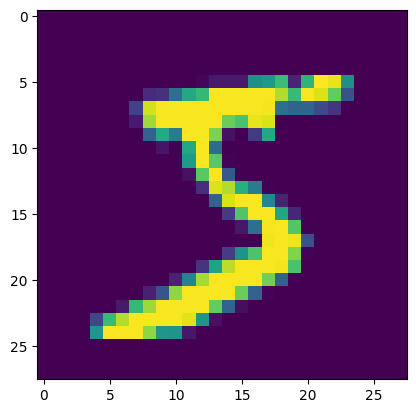

In [4]:
plt.imshow(x_treino[0])

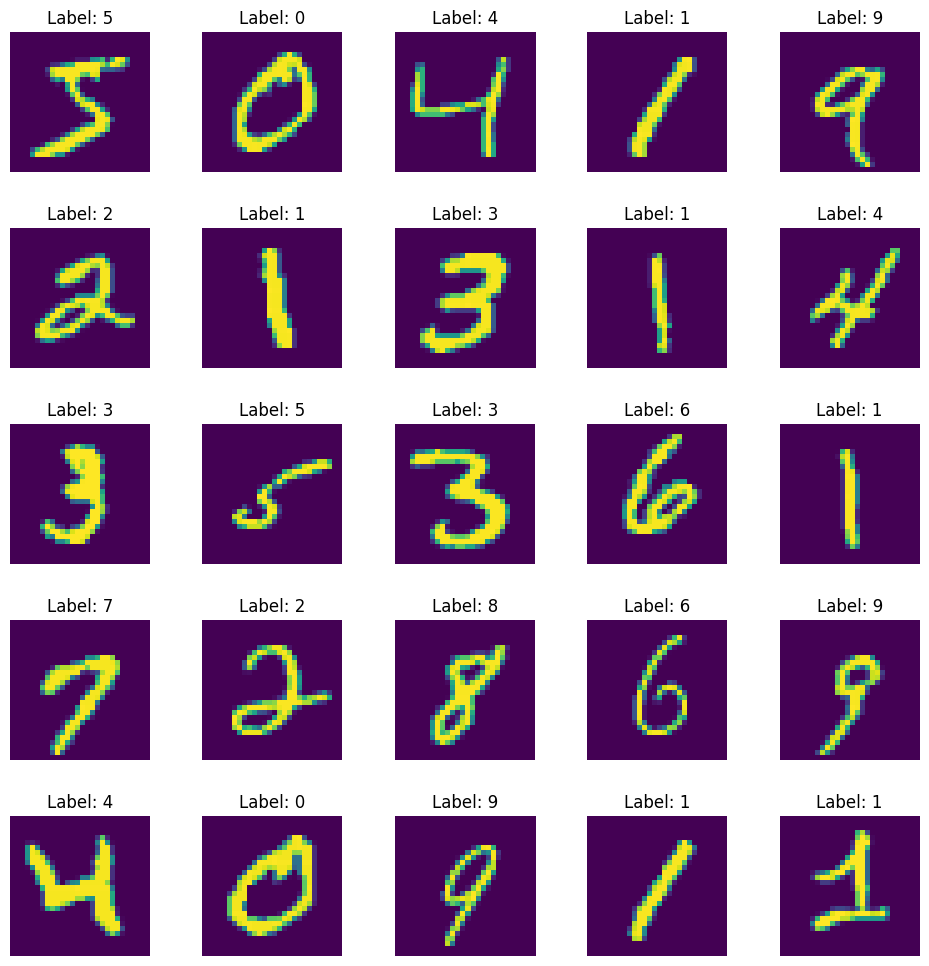

In [5]:
wgrid = 5
hgrid = 5
fig, axes = plt.subplots(hgrid, wgrid, figsize= (12,12))
axes = axes.ravel()

for i in np.arange(0, hgrid*wgrid):
  axes[i].imshow(x_treino[i]) 
  axes[i].set_title(f'Label: {y_treino[i]}')
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# Construindo um modelo

In [6]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation= 'relu'),
    tf.keras.layers.Dense(10, activation= 'softmax')
])

In [7]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

Definindo os callbacks

In [8]:
callback= [
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

Compilando o modelo

Como há 10 diferentes saídas, podendo ser qualquer algarismo de 0 a 9

Utilizaremos o loss como um sparse_categorical_crossentropy
e o metrics accuracy

In [9]:
modelo.compile(loss= 'sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

Treinando o modelo e adicionando o callback

In [10]:
historico = modelo.fit(x_treino, y_treino, validation_split= 0.15, callbacks= callback, epochs=10, verbose=1)

Epoch 1/10
1594/1594 [==============================] - 108s 66ms/step - loss: 0.3006 - accuracy: 0.9300 - val_loss: 0.1078 - val_accuracy: 0.9668
Epoch 2/10
1594/1594 [==============================] - 58s 37ms/step - loss: 0.0881 - accuracy: 0.9727 - val_loss: 0.0962 - val_accuracy: 0.9749
Epoch 3/10
1594/1594 [==============================] - 56s 35ms/step - loss: 0.0678 - accuracy: 0.9787 - val_loss: 0.0603 - val_accuracy: 0.9821
Epoch 4/10
1594/1594 [==============================] - 58s 37ms/step - loss: 0.0582 - accuracy: 0.9815 - val_loss: 0.0854 - val_accuracy: 0.9784
Epoch 5/10
1594/1594 [==============================] - 55s 35ms/step - loss: 0.0504 - accuracy: 0.9844 - val_loss: 0.0569 - val_accuracy: 0.9832
Epoch 6/10
1594/1594 [==============================] - 56s 35ms/step - loss: 0.0417 - accuracy: 0.9864 - val_loss: 0.0662 - val_accuracy: 0.9824
Epoch 7/10
1594/1594 [==============================] - 58s 36ms/step - loss: 0.0353 - accuracy: 0.9889 - val_loss: 0.0635 

Validação e Evaluation do modelo

In [11]:
modelo.evaluate(x_teste, y_teste)

313/313 [==============================] - 4s 11ms/step - loss: 0.0838 - accuracy: 0.9809


[0.0838356763124466, 0.98089998960495]

plotar

In [12]:
historico.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

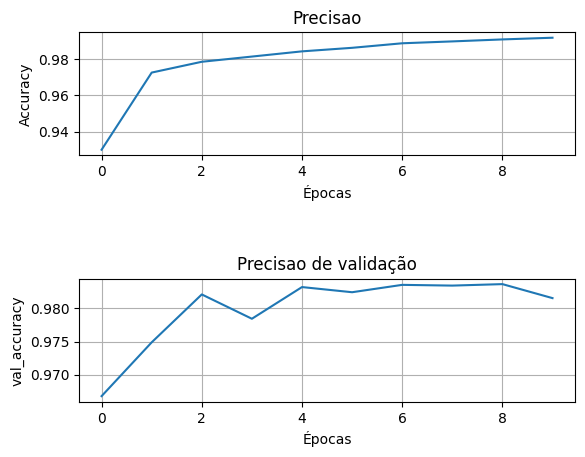

In [25]:
plt.figure()

plt.subplot(211)
plt.plot(historico.history['accuracy'])
plt.title('Precisao')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(212)
plt.plot(historico.history['val_accuracy'])
plt.title('Precisao de validação')
plt.xlabel('Épocas')
plt.ylabel('val_accuracy')
plt.grid(True)

plt.subplots_adjust(hspace=1)
plt.show()

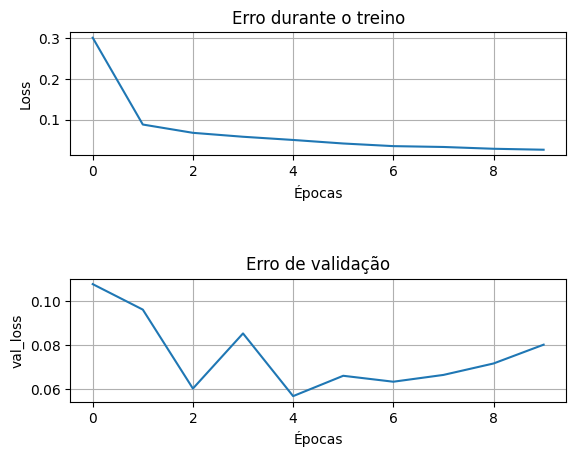

In [26]:
# Loss
plt.figure()

plt.subplot(211)
plt.plot(historico.history['loss'])
plt.title('Erro durante o treino')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(212)
plt.plot(historico.history['val_loss'])
plt.title('Erro de validação')
plt.xlabel('Épocas')
plt.ylabel('val_loss')
plt.grid(True)

plt.subplots_adjust(hspace=1)
plt.show()

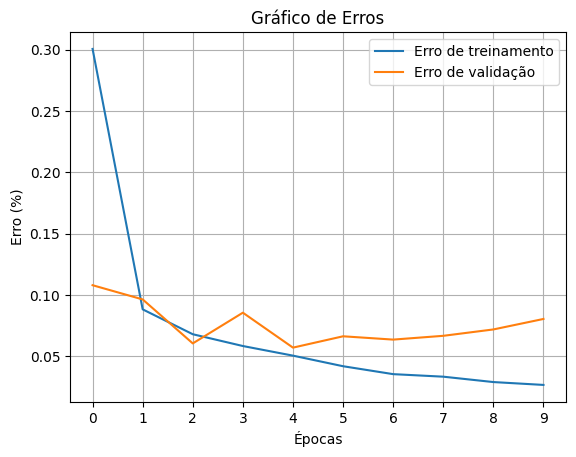

In [33]:
plt.figure()
eixo_x = np.arange(0,10,1)
plt.plot(historico.history['loss'], label='Erro de treinamento')
plt.plot(historico.history['val_loss'], label='Erro de validação')
plt.xticks(eixo_x)
plt.title('Gráfico de Erros')
plt.xlabel('Épocas')
plt.ylabel('Erro (%)')
plt.grid(True)
plt.legend()
plt.show()

Esta separação entre os erros do gráfico podem indicar que um treinamento mais prolongado deste modelo pode levar a OverFitting, já que o erro do dataset de treinamento continua com inclinação negativa enquanto que o comportamento do erro de validação aparenta um leve crescimento.

Matriz de confusão

Fácil visualização de quais combinações de classificação deram mais erro

In [14]:
import sklearn
from sklearn.metrics import confusion_matrix

In [15]:
# Criar um array com as predições do modelo feitos para todos os elementos de teste
# Vamos usar esse array para comparar com o label original na matriz de confusão

predicoes = modelo.predict(x_teste)

313/313 [==============================] - 3s 9ms/step


In [16]:
#Pegando apenas a maior previsão para cada imagem
classes_x =np.argmax(predicoes, axis=1)

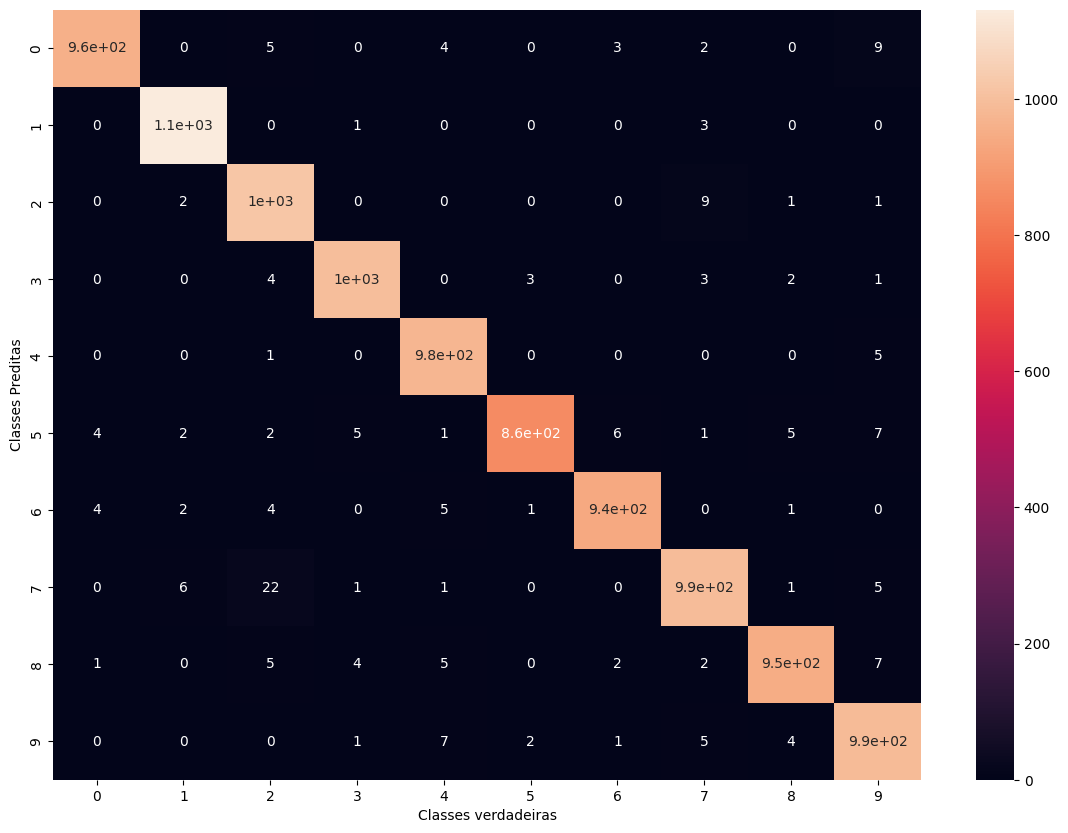

In [46]:
cm = confusion_matrix(y_teste, classes_x)
plt.figure(figsize= (14,10))
sns.heatmap(cm, annot= True)
plt.xlabel('Classes verdadeiras');
plt.ylabel('Classes Preditas');

A matriz de confusão deixa claro que o número de acertos (presentes na diagonal principal da matriz) foi muito superior ao número de erros, o que é um bom indicativo.

Observando a matriz com as cores do heatmap ainda é possível notar mais facilmente onde ocorreram os erros mais constantes (quão mais claro estiver a cor do quadrante, maior o número de erros). 

Um valor que certamente chama atenção é o valor da intersecção entre a classe verdadeira 2 e a predição 7. Isto nos indica que o modelo acaba classificando o número 2 como 7 um total de 22 vezes.

Plotar um grid 5x5 com imagens, suas labels e as predições


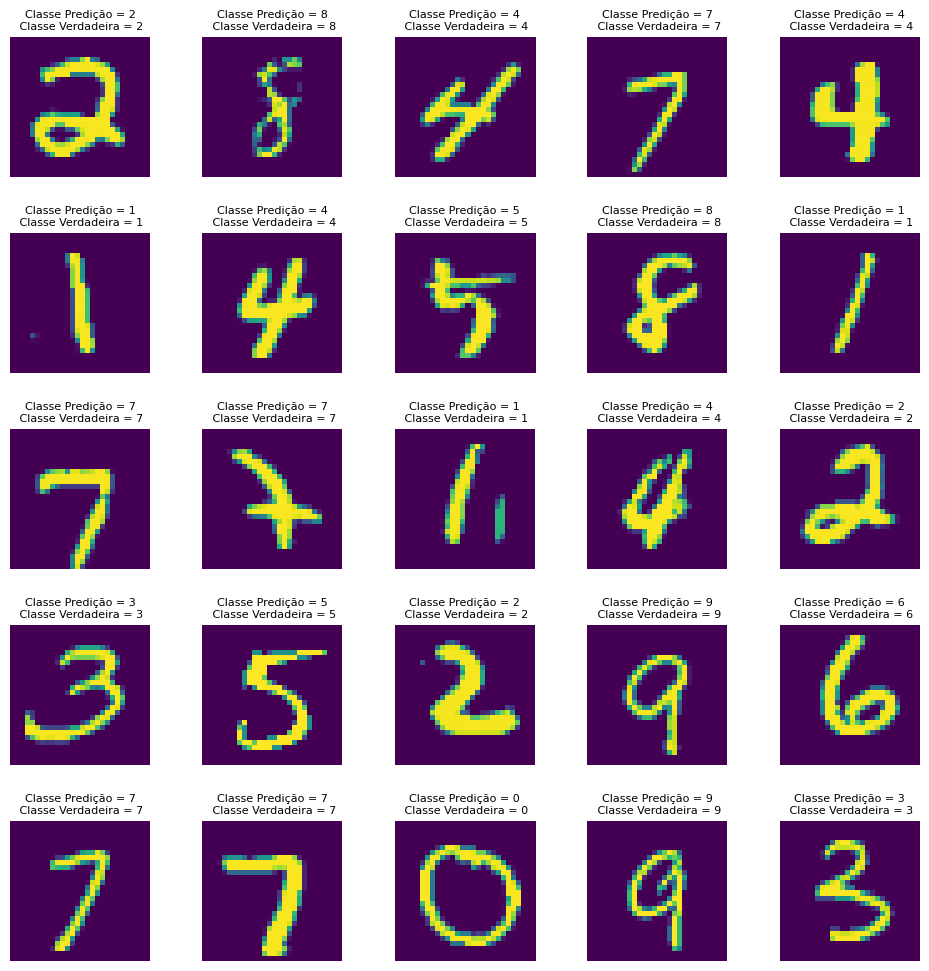

In [51]:
wgrid = 5
hgrid = 5
fig, axes = plt.subplots(hgrid, wgrid, figsize= (12,12))
axes = axes.ravel()

for i in np.arange(0, hgrid*wgrid):
  k = np.random.randint(0,10000)
  axes[i].imshow(x_teste[k].reshape((28,28)))
  axes[i].set_title(f'Classe Predição = {classes_x[k]}\n Classe Verdadeira = {y_teste[k]}', fontsize=8) 
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# Salvando o modelo

Nesse caso, para salvar o modelo será necessário conectar com o Drive

In [19]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


Depois iremos salvar o modelo mais recente.

Também é possível baixar ou salvar os modelos que foram salvos do Callback

<----------------

Modelo

In [20]:
import os

In [52]:
model_json = modelo.to_json()
with open("/content/drive/MyDrive/modelo_cnn_escrita-manual.json", "w") as json_file:
  json_file.write(model_json)

Pesos

In [53]:
modelo.save_weights("/content/drive/MyDrive/modelo_cnn_escrita-manual.h5")
print("Modelo salvo no Drive")

Modelo salvo no Drive


# Carregar o modelo posteriormente

Para carregar o modelo posteriormente, siga o passo a passo abaixo

A variável path precisa ser inicializada com o path do modelo ou deve ser substituída por ele


```
from keras.models import model_from_json

# load json and create model
json_file = open(path_modelo, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(path_pesos)
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss= 'sparse_categorical_crossentropy', optimizer= 'Adam', metrics= ['accuracy'])
score = loaded_model.evaluate(x_teste, y_teste, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
```

